In [1]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
import instance_maker as ins
import algorithms as algo

#repeat the experiment and take the average cost
experiment_num = 10

#fixed parameters
time_length = 2000
interval_mean = 2
shape = 2
price_mean = 50

#enumerating parameters
price_dists = ["Uniform", "Normal", "Pareto"]
Lambdas = [1, 0.6, 0.4]
perturb_probabilitys = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
algorithms = ["SUM", "FSUM", "PFSUM"]
for Lambda in Lambdas:
    algorithms.append("PDLA({}={})".format(r'$\lambda$', Lambda))

#competitive ratios
result_crs = []


In [2]:
#evaluate algorithms
def evaluate(instance, noisy_instance, parameter_sets, price_dist, perturb_prob):
    for param in parameter_sets:
        beta = param[0]
        T = param[1]
        C = param[2]

        offline_cost, offline_solution = algo.OFFLINE_OPTIMAL(instance, T, C, beta)
        noisy_offline_cost, noisy_offline_solution = algo.OFFLINE_OPTIMAL(noisy_instance, T, C, beta)
        noisy_prediction = ins.prediction_generator(noisy_instance, T)

        sum_cost, sum_solution = algo.SUM(instance, T, C, beta)
        fsum_cost, fsum_solution = algo.FSUM(instance, T, C, beta, noisy_prediction)
        pfsum_cost, pfsum_solution = algo.PFSUM(instance, T, C, beta, noisy_prediction)

        result_crs.append(("SUM", beta, T, perturb_prob, price_dist, C, sum_cost / offline_cost))
        result_crs.append(("FSUM", beta, T, perturb_prob, price_dist, C, fsum_cost / offline_cost))
        result_crs.append(("PFSUM", beta, T, perturb_prob, price_dist, C, pfsum_cost / offline_cost))

        for Lambda in Lambdas:
            pdla_cost, pdla_solution = algo.PDLA_FOR_BAHNCARD(instance, T, C, beta, Lambda, noisy_offline_solution)
            result_crs.append(("PDLA({}={})".format(r'$\lambda$', Lambda), beta, T, perturb_prob, price_dist, C, pdla_cost / offline_cost))

#plot results
def plot_cr(beta, T, C, price_dist, profile):
    points = {}
    for algo in algorithms:
        points[algo] = {}
        for perturb_prob in perturb_probabilitys:
            points[algo][perturb_prob] = [0, 0]
            
    for r in result_crs:
        if (r[1] != beta or r[2] != T or r[4] != price_dist or r[5] != C): continue
        points[r[0]][r[3]][0] += r[6]
        points[r[0]][r[3]][1] += 1
    
    ls = ['-', '-', '-', ':', ':', ':']
    marker = ['', '^', 'o', '', '^', 'o']
    plot_list = []

    legend_anchor = [0.6, 0.6]
    if (profile == "Occasional_travelers"):
        legend_anchor[0] = 0.85
        legend_anchor[1] = 0.45

    idx = 0
    for algo in algorithms:
        l = []
        for perturb_prob in perturb_probabilitys:
            l.append(points[algo][perturb_prob][0] / points[algo][perturb_prob][1])
        if (algo[:4] == "PDLA"):
            p, = plt.plot(perturb_probabilitys, l, color='k', ls=ls[idx], marker=marker[idx], linewidth=1, markerfacecolor='none', ms=6, label=algo)
            plot_list.append(p)
        else:
            p, = plt.plot(perturb_probabilitys, l, color='k', ls=ls[idx], marker=marker[idx], linewidth=1, ms=6, label=algo)
            plot_list.append(p)
        idx += 1

    print("{}, Beta = {}, T = {}, C = {}, Price distribution = {}".format(profile, beta, T, C, price_dist))
    plt.xlabel("Perturbing probability", fontsize=16)
    plt.ylabel("Competitive ratio", fontsize=16)
    first_legend = plt.legend(handles = plot_list[3:6], loc = 'center left', bbox_to_anchor = (0, legend_anchor[0]), prop = {'size': 13}, framealpha=0.7)
    plt.gca().add_artist(first_legend)
    plt.legend(handles = plot_list[0:3], loc = 'center right', bbox_to_anchor = (1, legend_anchor[1]), prop = {'size': 13}, framealpha=0.7)
    plt.gcf().subplots_adjust(left = 0.14, bottom = 0.14)
    plt.savefig("./figs/{}_{}_beta_{}_T_{}_C_{}_results.eps".format(profile, price_dist, beta, T, C), bbox_inches="tight", format='eps', pad_inches=0.005)
    plt.show()



In [3]:
#for the commuters, travel requests arise steadily every day
parameter_sets = [(0.8, 10, 100), (0.6, 5, 100), (0.6, 10, 200), (0.6, 10, 2000), (0.2, 10, 400)]

for price_dist in price_dists:
    for exp_count in range(0, experiment_num):
        #generate an instance
        np.random.seed(exp_count)
        instance = ins.instance_generator(time_length, "EveryDay", 0, price_dist, price_mean)
        for perturb_prob in perturb_probabilitys:
            noisy_instance = ins.noisy_instance_generator(instance, price_dist, price_mean, perturb_prob)
            evaluate(instance, noisy_instance, parameter_sets, price_dist, perturb_prob)


Commuters, Beta = 0.8, T = 10, C = 100, Price distribution = Uniform


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


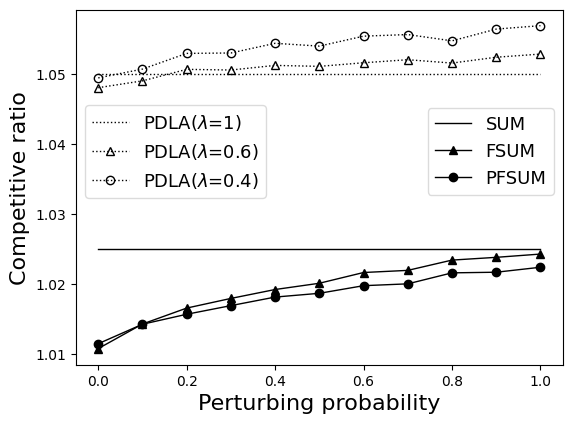

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Commuters, Beta = 0.8, T = 10, C = 100, Price distribution = Normal


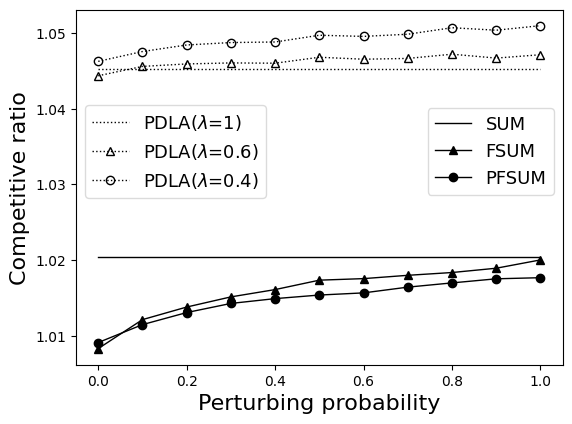

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Commuters, Beta = 0.8, T = 10, C = 100, Price distribution = Pareto


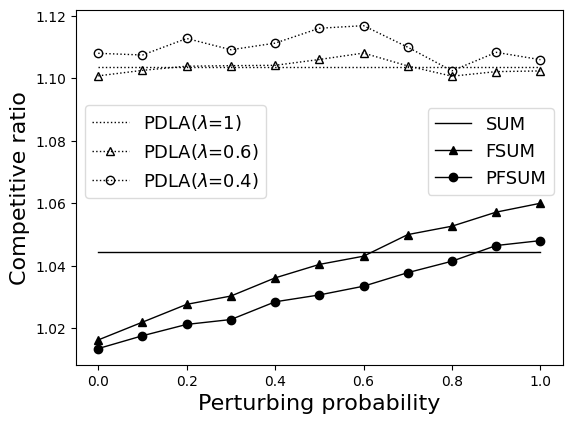

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Commuters, Beta = 0.6, T = 5, C = 100, Price distribution = Uniform


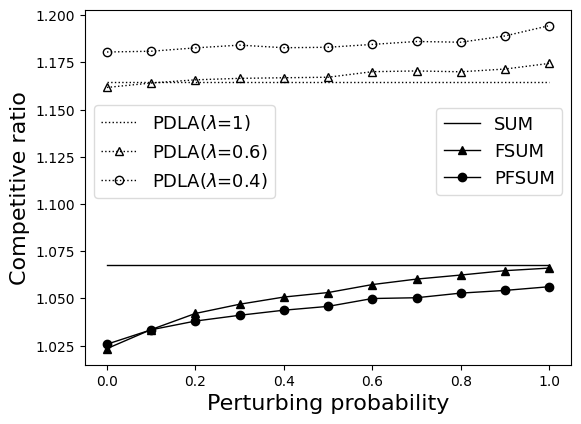

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Commuters, Beta = 0.6, T = 5, C = 100, Price distribution = Normal


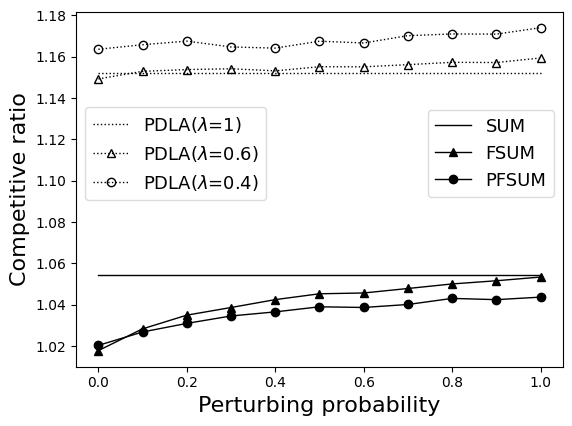

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Commuters, Beta = 0.6, T = 5, C = 100, Price distribution = Pareto


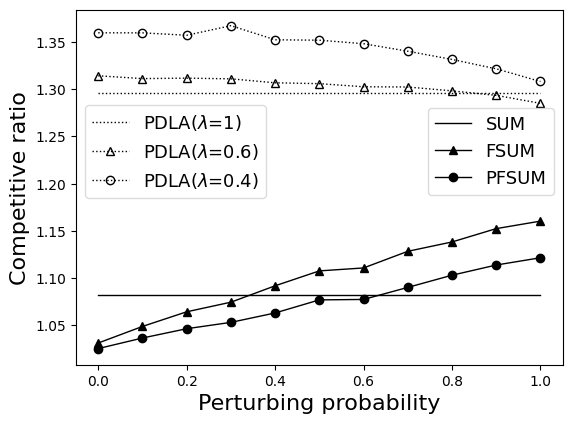

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Commuters, Beta = 0.6, T = 10, C = 200, Price distribution = Uniform


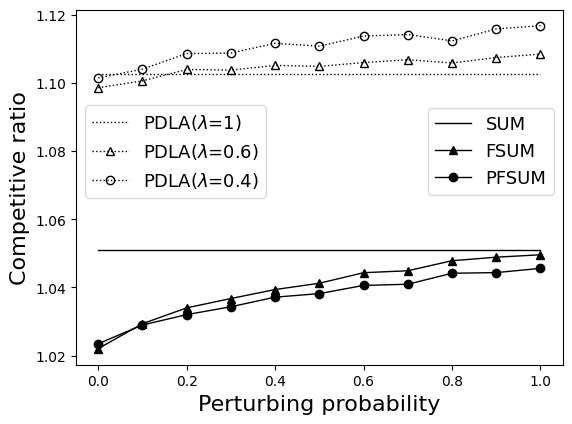

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Commuters, Beta = 0.6, T = 10, C = 200, Price distribution = Normal


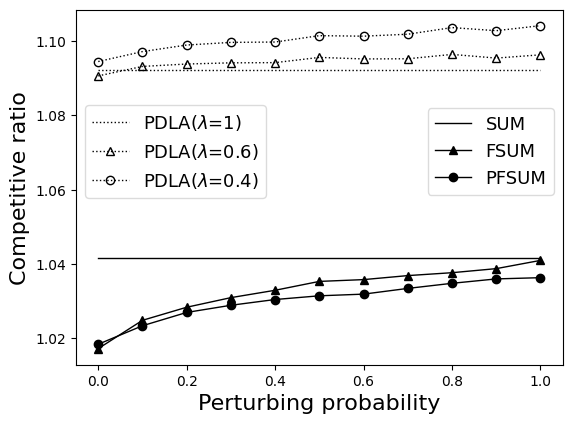

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Commuters, Beta = 0.6, T = 10, C = 200, Price distribution = Pareto


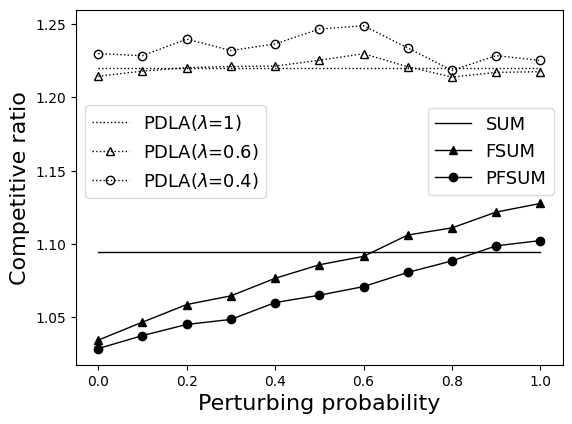

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Commuters, Beta = 0.6, T = 10, C = 2000, Price distribution = Uniform


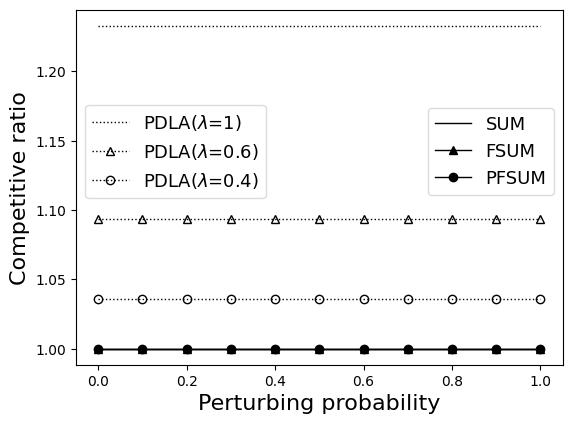

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Commuters, Beta = 0.6, T = 10, C = 2000, Price distribution = Normal


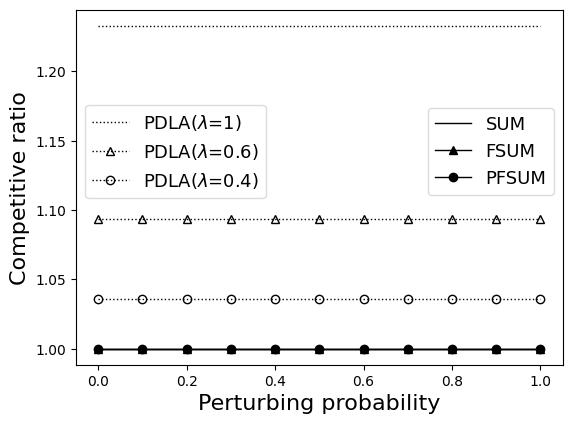

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Commuters, Beta = 0.6, T = 10, C = 2000, Price distribution = Pareto


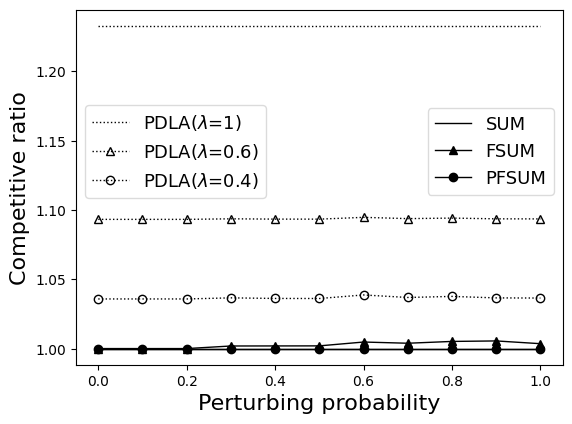

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Commuters, Beta = 0.2, T = 10, C = 400, Price distribution = Uniform


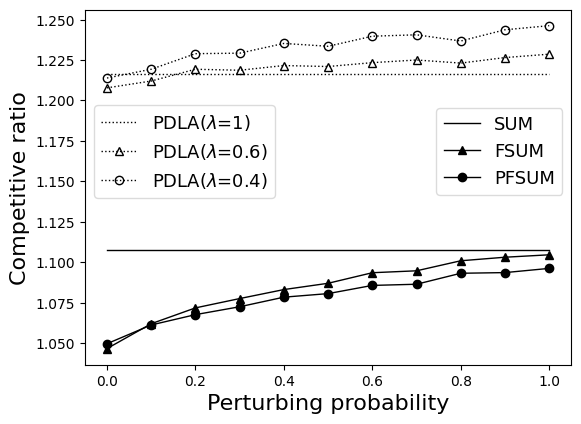

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Commuters, Beta = 0.2, T = 10, C = 400, Price distribution = Normal


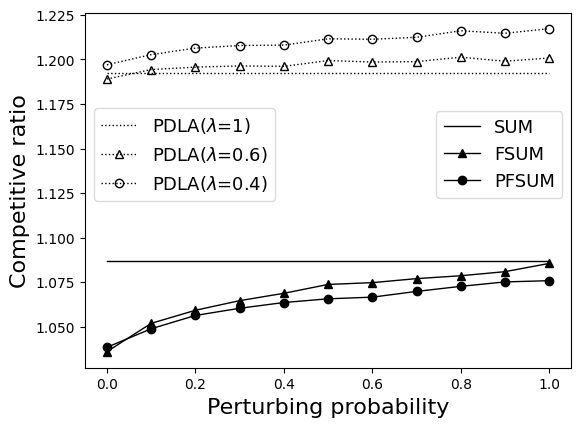

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Commuters, Beta = 0.2, T = 10, C = 400, Price distribution = Pareto


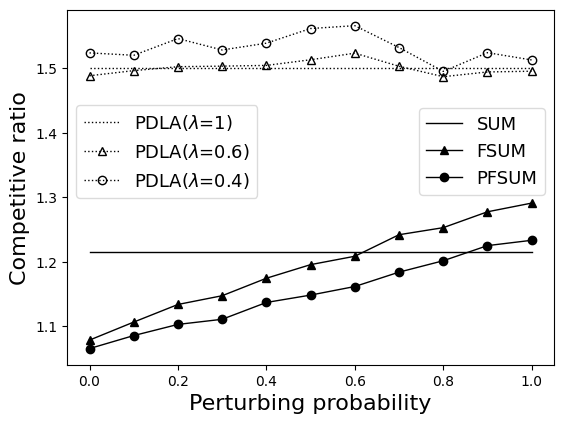

In [4]:
profile = "Commuters"
for param in parameter_sets:
    for price_dist in price_dists:
        plot_cr(param[0], param[1], param[2], price_dist, profile)

In [5]:
#for the occasional travelers, travel requests occur at intervals
parameter_sets = [(0.8, 10, 100), (0.6, 5, 100), (0.6, 10, 200), (0.6, 10, 2000), (0.2, 10, 400)]

for price_dist in price_dists:
    for exp_count in range(0, experiment_num):
        #generate an instance
        np.random.seed(exp_count)
        instance = ins.instance_generator(time_length, "Exponential", interval_mean, price_dist, price_mean)
        for perturb_prob in perturb_probabilitys:
            noisy_instance = ins.noisy_instance_generator(instance, price_dist, price_mean, perturb_prob)
            evaluate(instance, noisy_instance, parameter_sets, price_dist, perturb_prob)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Occasional_travelers, Beta = 0.8, T = 10, C = 100, Price distribution = Uniform


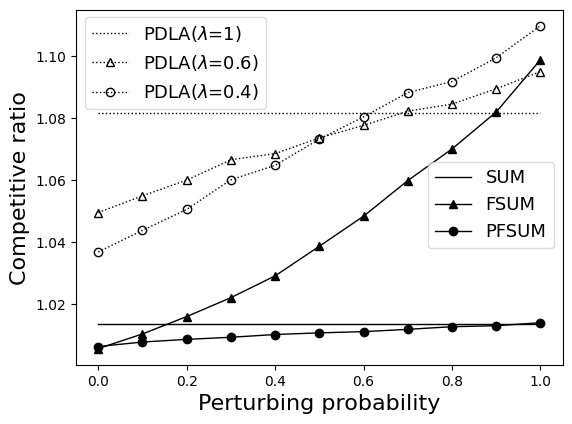

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Occasional_travelers, Beta = 0.8, T = 10, C = 100, Price distribution = Normal


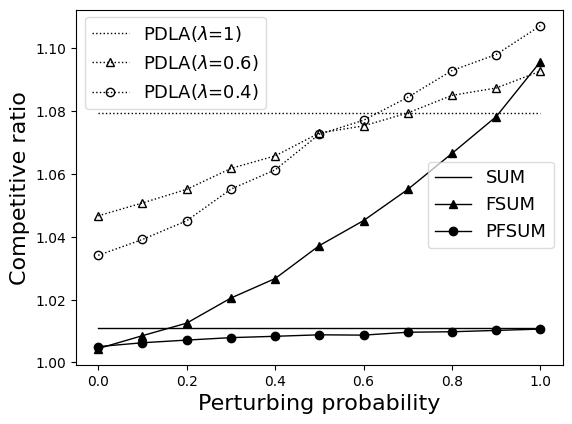

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Occasional_travelers, Beta = 0.8, T = 10, C = 100, Price distribution = Pareto


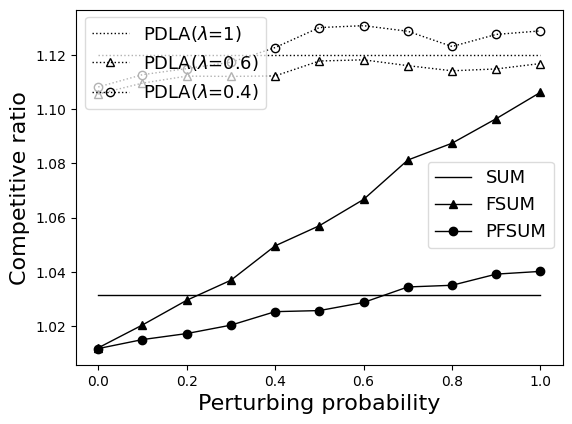

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Occasional_travelers, Beta = 0.6, T = 5, C = 100, Price distribution = Uniform


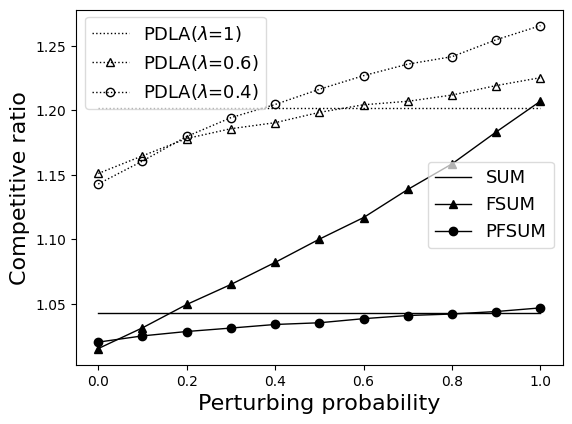

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Occasional_travelers, Beta = 0.6, T = 5, C = 100, Price distribution = Normal


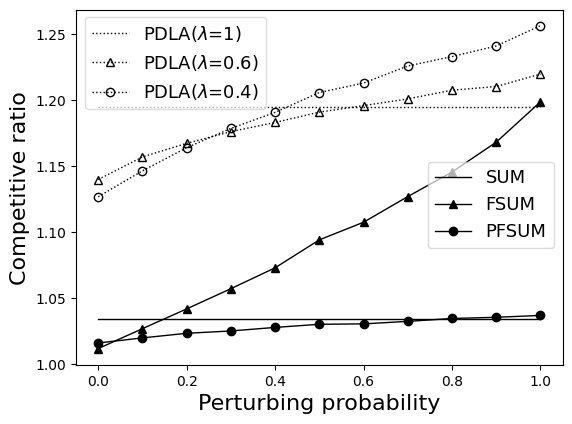

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Occasional_travelers, Beta = 0.6, T = 5, C = 100, Price distribution = Pareto


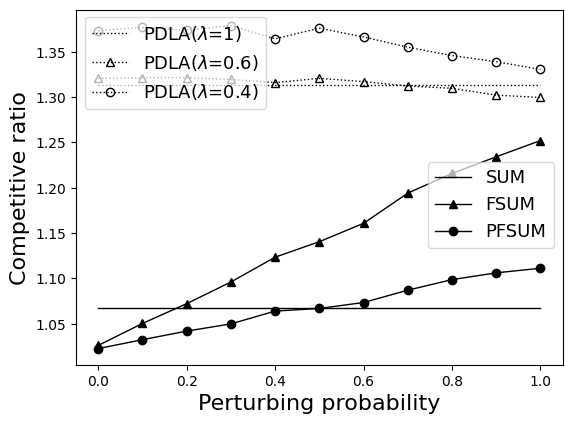

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Occasional_travelers, Beta = 0.6, T = 10, C = 200, Price distribution = Uniform


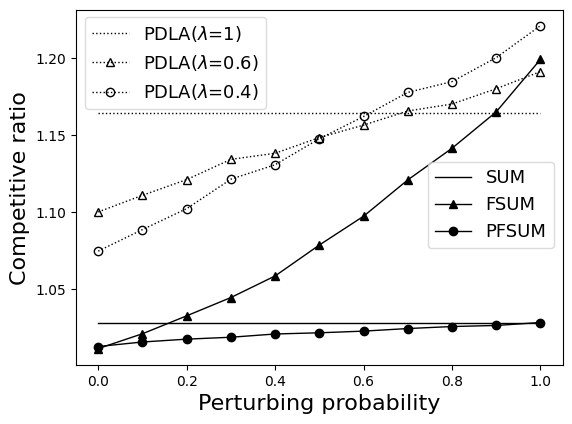

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Occasional_travelers, Beta = 0.6, T = 10, C = 200, Price distribution = Normal


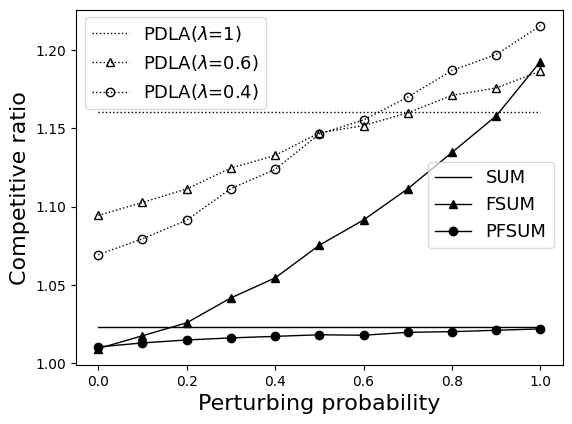

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Occasional_travelers, Beta = 0.6, T = 10, C = 200, Price distribution = Pareto


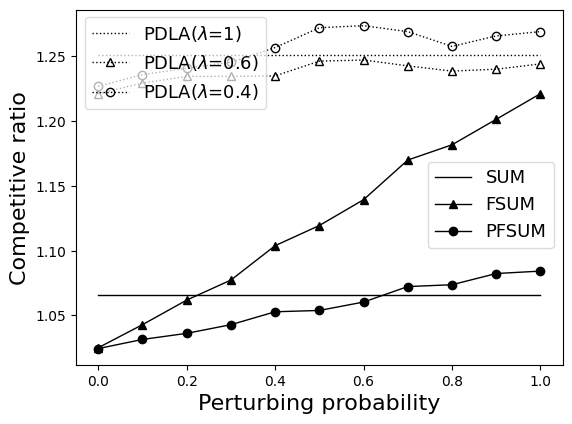

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Occasional_travelers, Beta = 0.6, T = 10, C = 2000, Price distribution = Uniform


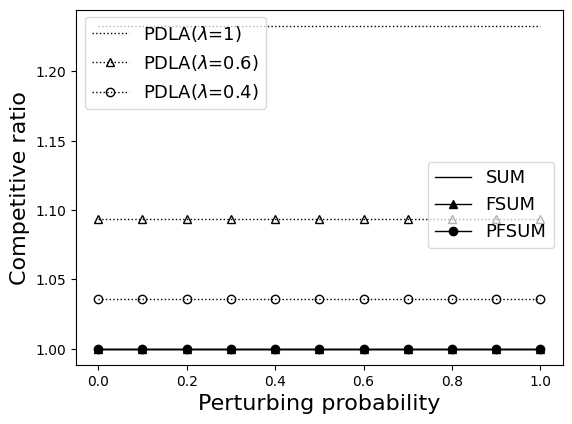

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Occasional_travelers, Beta = 0.6, T = 10, C = 2000, Price distribution = Normal


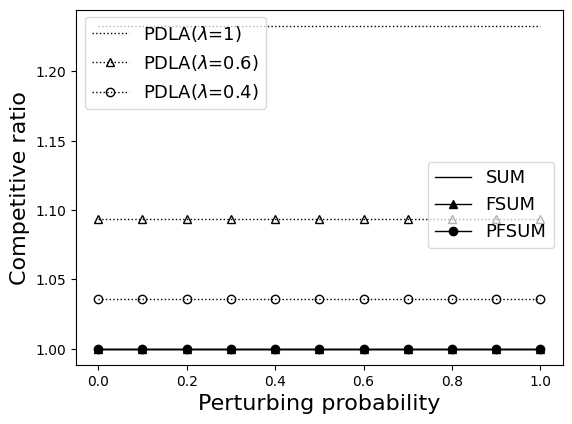

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Occasional_travelers, Beta = 0.6, T = 10, C = 2000, Price distribution = Pareto


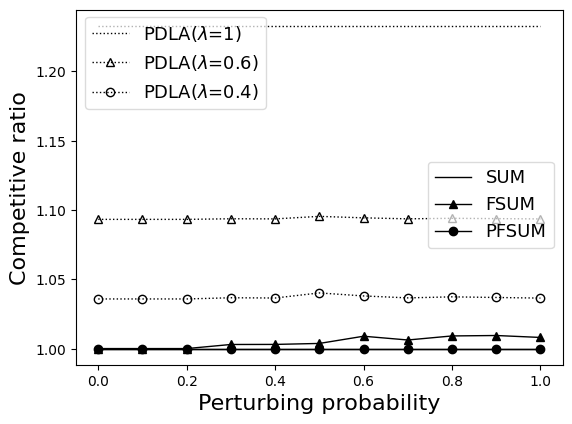

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Occasional_travelers, Beta = 0.2, T = 10, C = 400, Price distribution = Uniform


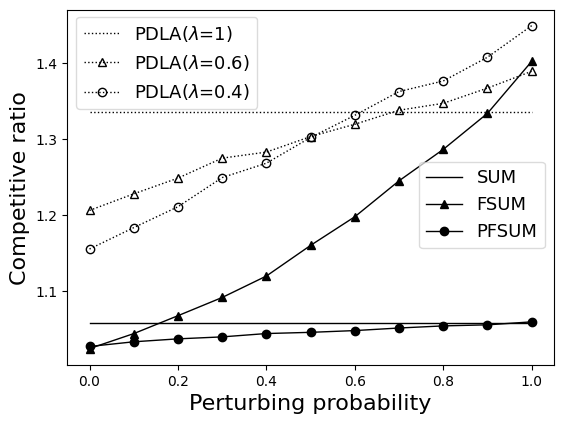

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Occasional_travelers, Beta = 0.2, T = 10, C = 400, Price distribution = Normal


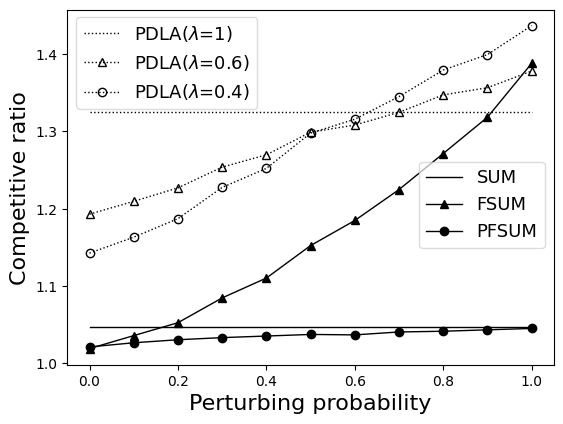

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Occasional_travelers, Beta = 0.2, T = 10, C = 400, Price distribution = Pareto


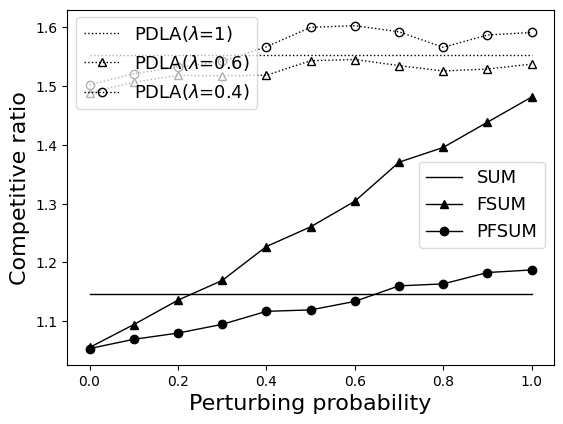

In [6]:
profile = "Occasional_travelers"
for param in parameter_sets:
    for price_dist in price_dists:
        plot_cr(param[0], param[1], param[2], price_dist, profile)
